In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #1moddel
from sklearn.preprocessing import PolynomialFeatures     #2model
from sklearn.ensemble import RandomForestRegressor #3model
from sklearn.tree import DecisionTreeRegressor #4model
from sklearn.linear_model import Lasso #5model
from sklearn.svm import SVR #6model
from sklearn.linear_model import Ridge #7model
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:
#loading
df=pd.read_csv('train_data.csv',index_col=0)
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


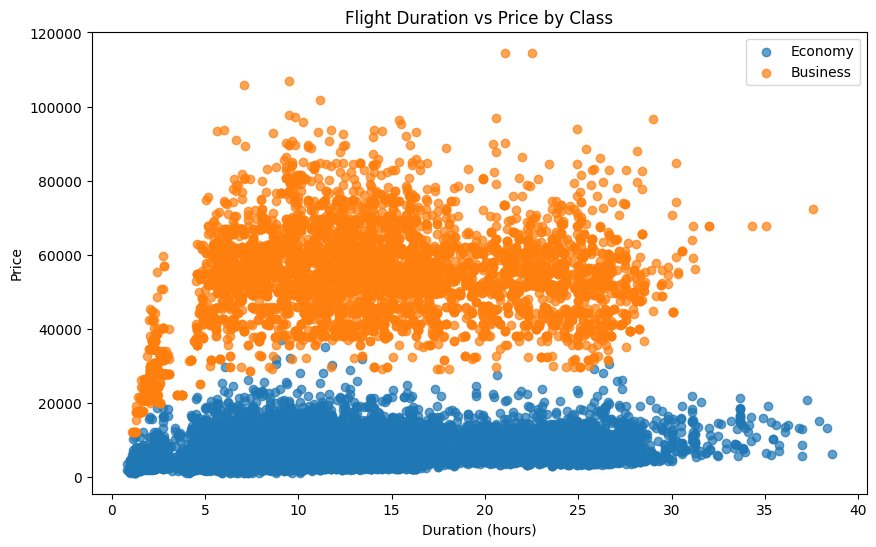

In [ ]:
# @title Flight Duration vs Price by Class

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df[df['class'] == 0]['duration'], df[df['class'] == 0]['price'], label='Economy', alpha=0.7)
plt.scatter(df[df['class'] == 1]['duration'], df[df['class'] == 1]['price'], label='Business', alpha=0.7)
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.title('Flight Duration vs Price by Class')
_ = plt.legend()

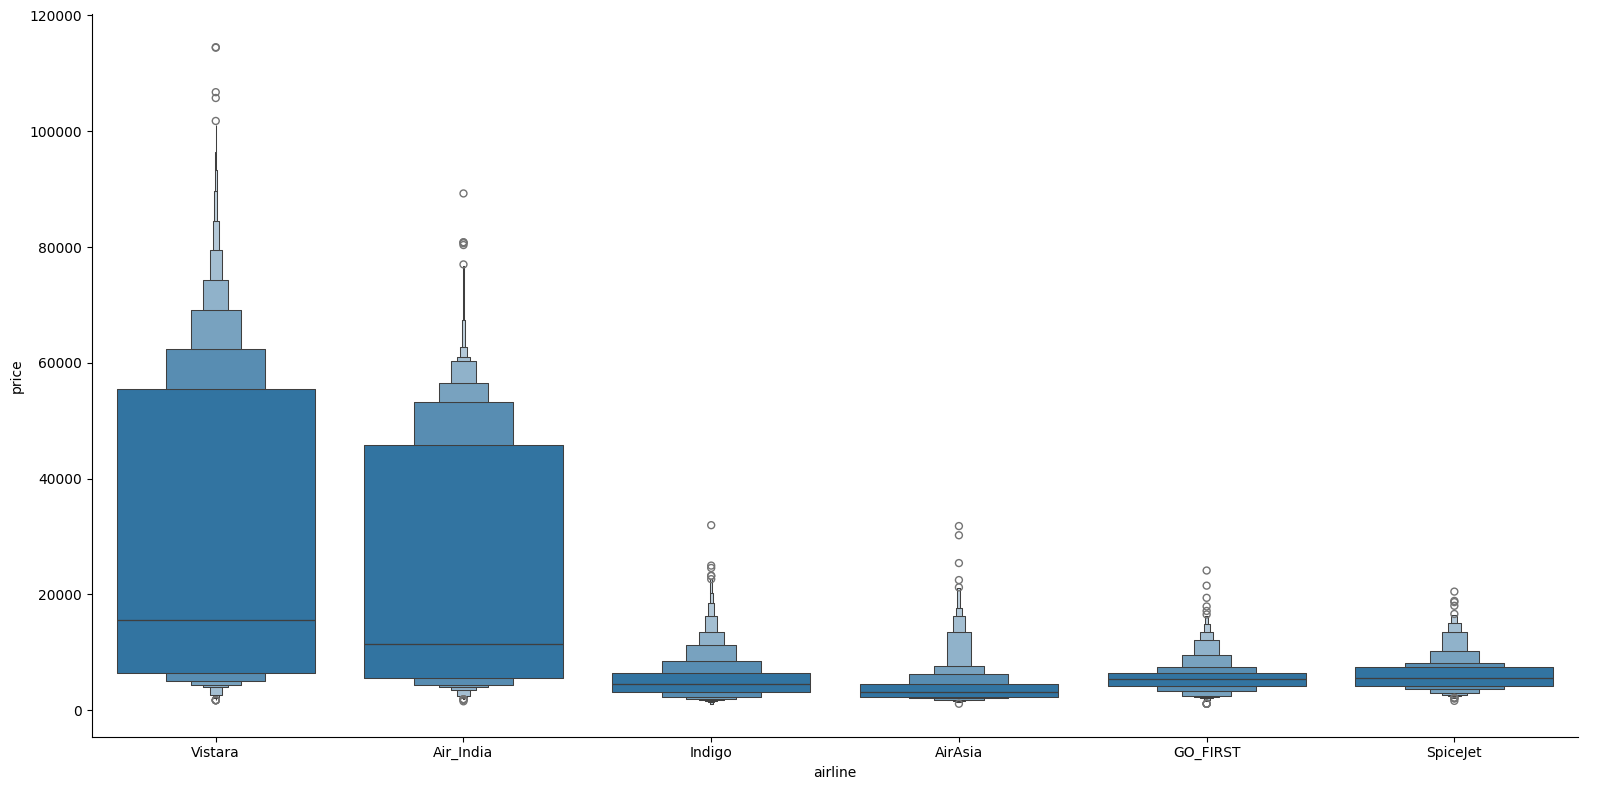

In [ ]:
sns.catplot(y = "price", x = "airline", data = df.sort_values("price", ascending = False), kind="boxen", height = 8, aspect = 2)
plt.show()

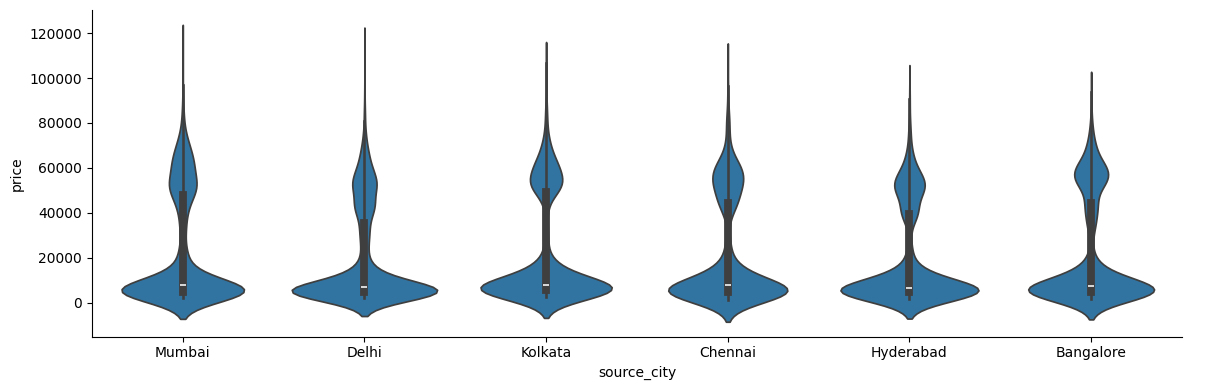

In [ ]:
sns.catplot(y = "price", x = "source_city", data = df.sort_values("price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

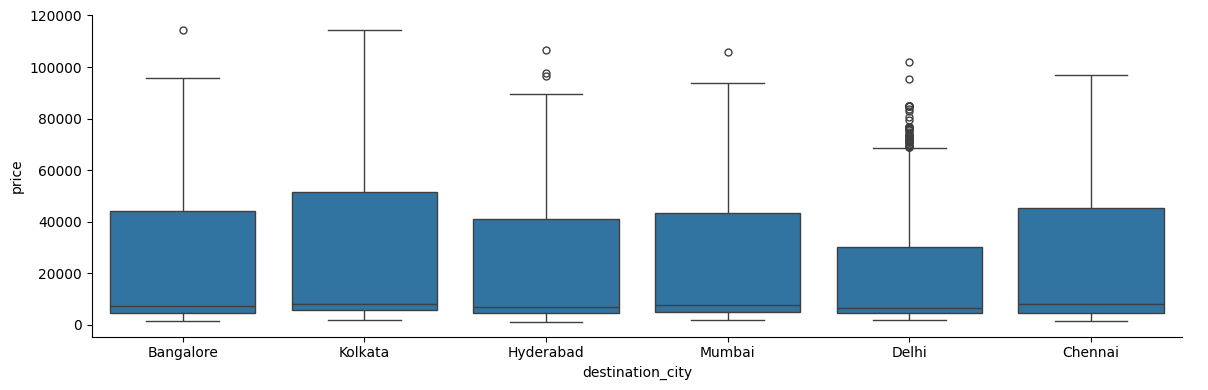

In [ ]:
sns.catplot(y = "price", x = "destination_city", data = df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

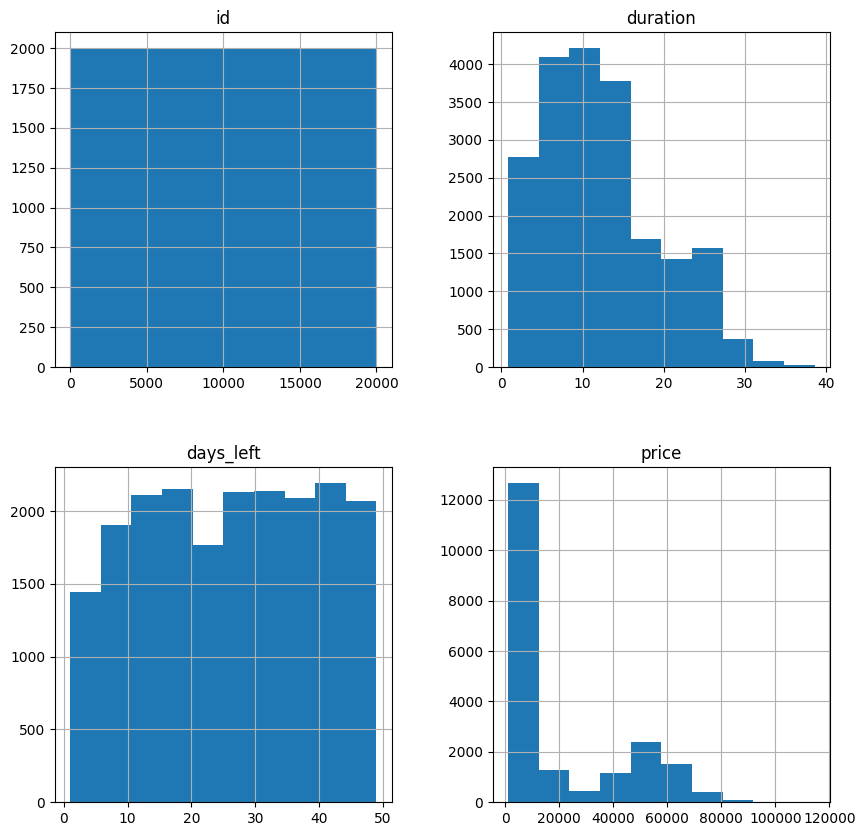

In [ ]:
df.hist(figsize=(10,10))
plt.show()

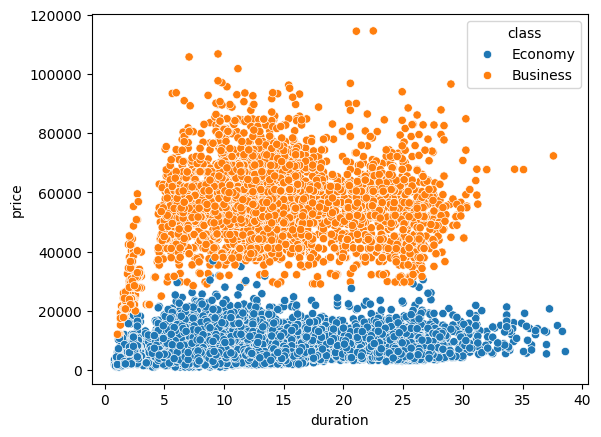

In [ ]:
sns.scatterplot(x='duration',y='price',hue='class', data=df)
plt.show()

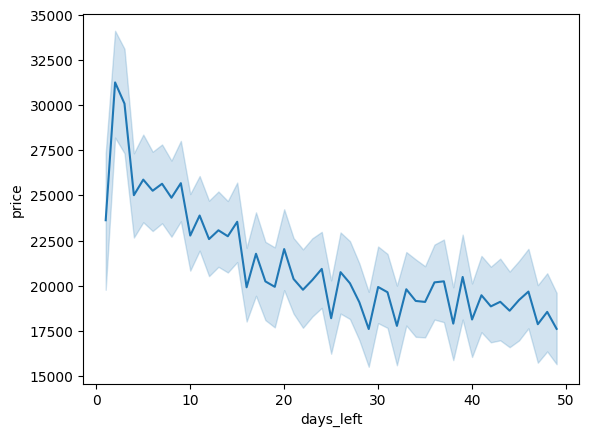

In [ ]:
sns.lineplot(x='days_left',y='price',data=df)
plt.show()

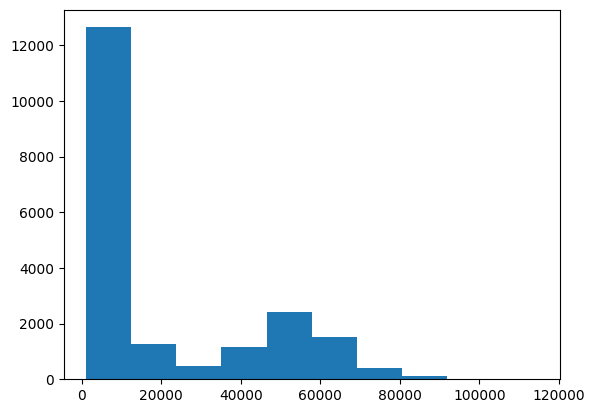

In [ ]:
plt.hist(df['price'])
plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [ ]:
#cat_to_numeric
df.stops.replace({'zero':0,'one':1,'two_or_more':+2},inplace=True)
df['class'].replace({'Business':1,'Economy':0},inplace=True)
df['arrival_time'].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5},inplace=True)
df['departure_time'].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5},inplace=True)
df['destination_city'].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Kolkata':3,'Mumbai':4,'Hyderabad':5},inplace=True)
df['source_city'].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Kolkata':3,'Mumbai':4,'Hyderabad':5},inplace=True)

In [ ]:
df.describe()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,20000.00000,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.39710,1.873850,0.922700,2.7127,2.426300,0.312350,12.177627,25.924150,20960.281700
std,1.73953,1.418498,0.400915,1.3430,1.723577,0.463463,7.157944,13.624874,22775.459535
min,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.00000,1.000000,1.000000,1.0000,1.000000,0.000000,6.830000,14.000000,4783.000000
50%,2.00000,2.000000,1.000000,3.0000,3.000000,0.000000,11.250000,26.000000,7425.000000
75%,4.00000,3.000000,1.000000,4.0000,4.000000,1.000000,16.080000,38.000000,42521.000000
max,5.00000,5.000000,2.000000,5.0000,5.000000,1.000000,38.580000,49.000000,114523.000000


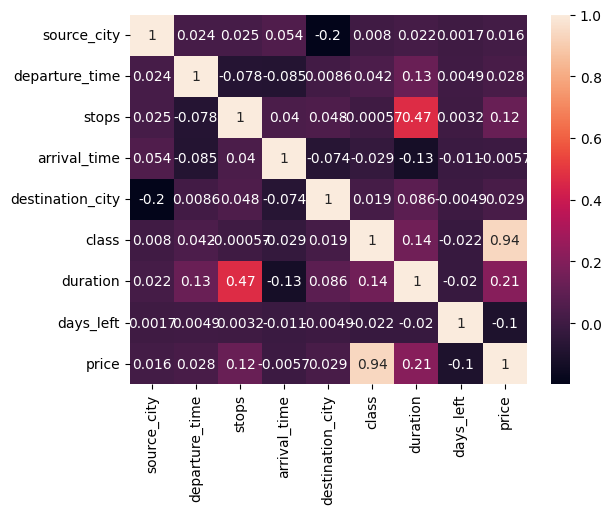

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
df.corrwith(df['price'], numeric_only=True).sort_values(ascending=False)*100

price               100.000000
class                93.786782
duration             21.315809
stops                12.145498
destination_city      2.858369
departure_time        2.753157
source_city           1.580454
arrival_time         -0.567017
days_left           -10.254494
dtype: float64

In [ ]:
la=LabelEncoder()
df['airline']=la.fit_transform(df['airline'])
df['flight']=la.fit_transform(df['flight'])

In [ ]:
def detect_outliers_iqr(data, threshold=1.5):
  Q1 = np.quantile(data, 0.25)
  Q3 = np.quantile(data, 0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + threshold * IQR
  lower_bound = Q1 - threshold * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  bounds = {"upper": upper_bound, "lower": lower_bound}

  return outliers, bounds

data = df
outliers_iqr, bounds_iqr = detect_outliers_iqr(data)
print("Outliers (IQR):", outliers_iqr)
print("Bounds (IQR):", bounds_iqr)


Outliers (IQR):        airline  flight  source_city  departure_time  stops  arrival_time  \
id                                                                         
1          NaN  1214.0          NaN             NaN    NaN           NaN   
2          NaN  1126.0          NaN             NaN    NaN           NaN   
3          NaN  1245.0          NaN             NaN    NaN           NaN   
4          NaN  1191.0          NaN             NaN    NaN           NaN   
5          NaN   275.0          NaN             NaN    NaN           NaN   
...        ...     ...          ...             ...    ...           ...   
19996      NaN   329.0          NaN             NaN    NaN           NaN   
19997      NaN   999.0          NaN             NaN    NaN           NaN   
19998      NaN  1235.0          NaN             NaN    NaN           NaN   
19999      NaN  1309.0          NaN             NaN    NaN           NaN   
20000      NaN  1207.0          NaN             NaN    NaN           NaN

In [ ]:
clean_data = data[~np.isin(df, outliers_iqr)]
clean_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,5,1214,1,0,1,4,4,0,14.25,21,7212
1,5,1214,1,0,1,4,4,0,14.25,21,7212
1,5,1214,1,0,1,4,4,0,14.25,21,7212
1,5,1214,1,0,1,4,4,0,14.25,21,7212
1,5,1214,1,0,1,4,4,0,14.25,21,7212
...,...,...,...,...,...,...,...,...,...,...,...
20000,5,1207,3,3,1,1,2,0,18.25,26,7141
20000,5,1207,3,3,1,1,2,0,18.25,26,7141
20000,5,1207,3,3,1,1,2,0,18.25,26,7141


In [ ]:
X=clean_data[['class','duration','stops','days_left','airline','flight']] #only strong corr
y=clean_data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR_pred=LR.predict(X_test)
LR_pred

array([ 6003.93988287, 50019.1711534 ,  5098.88825622, ...,
       51952.91621459,  9378.57658454, 53026.02954793])

In [ ]:
y_test

id
10509    17621
1763     45257
9046      8530
2803      7212
9348      6488
         ...  
2407      3062
2948     28510
18676    57081
8509      5060
10925    50271
Name: price, Length: 36051, dtype: int64

In [ ]:
mae=mean_absolute_error(y_test,LR_pred)
mae

4531.745368140278

In [ ]:
mse=mean_squared_error(y_test,LR_pred)
mse

48195980.464734785

In [ ]:
#poly
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train)
lr=LinearRegression()
lr.fit(X_poly,y_train)

LinearRegression()

In [ ]:
poly_pred=lr.predict(poly.fit_transform(X_test))
poly_pred

array([ 4093203.54292393, -8957273.69578743,  4090132.99850845, ...,
       -8948370.4609499 ,  4092131.7309866 , -8954677.64204502])

In [ ]:
mae=mean_absolute_error(y_test,poly_pred)
mae #bomadi

5620566.808944713

In [ ]:
#randomforest
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_pred=rf.predict(X_test)
rf_pred

array([17504.32, 46981.8 ,  7361.15, ..., 56819.73,  5218.72, 51448.82])

In [ ]:
mae=mean_absolute_error(y_test,rf_pred)
mae

2420.551165073858

In [ ]:
y_test

id
10509    17621
1763     45257
9046      8530
2803      7212
9348      6488
         ...  
2407      3062
2948     28510
18676    57081
8509      5060
10925    50271
Name: price, Length: 36051, dtype: int64

In [ ]:
#decision tree
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt_pred=dt.predict(X_test)
dt_pred

array([17621., 47217.,  8530., ..., 57081.,  5322., 50271.])

In [ ]:
mae=mean_absolute_error(y_test,dt_pred)
mae #optimal

2763.649619013686

In [ ]:
#lasso
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
lasso_pred=lasso.predict(X_test)
lasso_pred

array([ 6008.91338605, 50018.47460669,  5098.91475996, ...,
       51952.28866847,  9379.58187998, 53022.89709495])

In [ ]:
mae=mean_absolute_error(y_test,lasso_pred)
mae

4531.354997087509

In [ ]:
#svr
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [ ]:
svr_pred=svr.predict(X_test)
svr_pred

array([ 9284.43984682, 23019.36432933,  8027.11209706, ...,
       24106.09613232,  8008.21775768, 22444.18614745])

In [ ]:
mae=mean_absolute_error(y_test,svr_pred) #waste of timeee
mae

10645.003174591033

In [ ]:
#all values
X=clean_data.drop('price',axis=1)
y=clean_data['price']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_pred=rf.predict(X_test)
rf_pred


array([17621.  , 45229.  ,  8530.  , ...,  4417.  ,  6188.63, 69168.  ])

In [ ]:
y_test

id
10509    17621
1763     45257
9046      8530
2803      7212
9348      6488
         ...  
5248     50751
10571    57057
5254      4417
7082      6198
2295     69168
Name: price, Length: 54077, dtype: int64

In [ ]:
mae=mean_absolute_error(y_test,rf_pred) #best model
mae

457.9304746358098

In [ ]:
#test
test=pd.read_csv('test_data.csv',index_col=0)
test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [ ]:
test.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [ ]:
test.stops.replace({'zero':0,'one':1,'two_or_more':+2},inplace=True)
test['class'].replace({'Business':1,'Economy':0},inplace=True)
test['arrival_time'].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5},inplace=True)
test['departure_time'].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5},inplace=True)
test['destination_city'].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Kolkata':3,'Mumbai':4,'Hyderabad':5},inplace=True)
test['source_city'].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Kolkata':3,'Mumbai':4,'Hyderabad':5},inplace=True)

In [ ]:
la=LabelEncoder()
test['airline']=la.fit_transform(test['airline'])
test['flight']=la.fit_transform(test['flight'])

In [ ]:
sc=StandardScaler()
test=sc.fit_transform(test)

In [ ]:
rf_pred=rf.predict(test)
rf_pred


array([57474.57, 59917.8 , 23376.76, ..., 50271.  , 49367.25, 67060.92])

In [ ]:
sample=pd.DataFrame(test)
sample.head()
sample['price']=rf_pred
sample


,0,1,2,3,4,5,6,7,8,9,price
0,-1.126472,-0.597716,0.350923,0.805184,0.200377,0.975801,-1.405402,1.508109,2.179304,-1.754111,57474.57
1,1.059155,0.830082,-1.377194,-1.312236,0.200377,0.975801,0.919691,1.508109,0.205481,0.583184,59917.80
2,-1.126472,-0.788338,0.926962,-1.312236,-2.381799,-2.006021,-0.242856,1.508109,-1.413821,0.291022,23376.76
3,-1.672879,0.415198,1.503001,1.510991,0.200377,1.721257,-1.405402,-0.663082,-0.979909,-0.001139,2295.08
4,-1.126472,-0.582765,0.350923,1.510991,0.200377,-0.515110,0.919691,-0.663082,0.547683,0.656225,5561.56
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.126472,-0.586503,0.350923,0.099378,0.200377,-1.260565,-0.824129,1.508109,0.696883,-0.804585,60569.42
4996,-0.033659,-1.461122,0.350923,-0.606429,-2.381799,-0.515110,0.919691,-0.663082,-1.276940,1.021427,4520.95
4997,-1.126472,-1.001386,0.350923,-0.606429,0.200377,0.975801,0.919691,1.508109,-0.158623,0.802306,50271.00
4998,-1.126472,-0.672469,0.926962,-1.312236,0.200377,0.975801,1.500964,1.508109,0.137040,0.875346,49367.25


In [ ]:
sample.price=sample.price.apply(round).astype(int)


In [ ]:
samples = sample['price']
samples.index=sample.index+1
samples.to_csv('submission.csv',index_label='id')

In [ ]:
r=pd.read_csv('submission.csv')
r.tail()

,id,price
4995,4996,60569
4996,4997,4521
4997,4998,50271
4998,4999,49367
4999,5000,67061


In [ ]:
#with outliners
x=df.drop('price',axis=1)
y=df['price']
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_pred=rf.predict(X_test)
rf_pred

array([ 5938.44, 57627.02, 56946.55, ...,  5879.29, 54307.99,  5593.09])

In [ ]:
mae=mean_absolute_error(y_test,rf_pred)
mae #noo

2487.1424400000005

#Summary
*  Yuqoridagi modellardan eng samarodiri Randomforest bo'ldi.


* Eng kuchli korelatsiyalik ustunlarni o'lgandan ko'ra, hamma ustunlarni olgandagi aniqlik balandroq chiqdi.

* Outlierlar olib tashlandi

